In [37]:
import cv2
import matplotlib.pyplot as plt
import easyocr

In [38]:
#pip install easyocr

In [39]:
# load the image, resize it, and convert it to grayscale

width = 800
height = 400

image = cv2.imread("mercedes.jpg")
image = cv2.resize(image, (width, height))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [40]:
# load the number plate detector
n_plate_detector = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")

In [41]:
# detect the number plates in the grayscale image
detections = n_plate_detector.detectMultiScale(gray, scaleFactor=1.05, minNeighbors=7)

In [42]:
reader = easyocr.Reader(['en'])
result = reader.readtext(image)
print(result[0][1])
digits=result[0][1]

SMJ3681H


In [43]:
# loop over the number plate bounding boxes
for (x, y, w, h) in detections:
    # draw a rectangle around the number plate
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
    cv2.putText(image, digits, (x - 20, y - 10),
                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 255), 2)

    # extract the number plate from the grayscale image
    number_plate = gray[y:y + h, x:x + w]

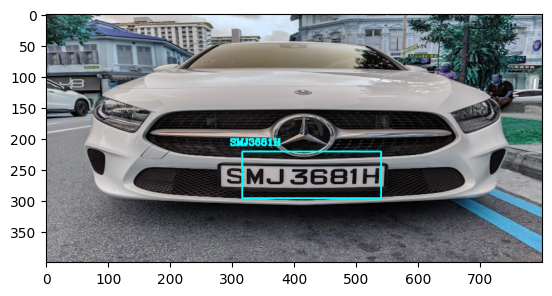

In [44]:
plt.imshow(image)